In [1]:
from spectral_data_types.Channel import Channel
from spectral_data_types.Particle import Particle
from utils.misc import read_in_hdf5_spectra
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



In [2]:
spectra = read_in_hdf5_spectra("data/210601_NBS295-106/20210601_152616_mass-001.hdf5")
sample = Particle(spectra)


In [3]:

print(sample.channels.keys())

dict_keys(['chan1', 'chan101', 'chan103', 'chan105', 'chan107', 'chan109', 'chan111', 'chan113', 'chan115', 'chan117', 'chan119', 'chan121', 'chan123', 'chan125', 'chan129', 'chan13', 'chan131', 'chan133', 'chan135', 'chan137', 'chan139', 'chan141', 'chan143', 'chan145', 'chan147', 'chan149', 'chan15', 'chan151', 'chan153', 'chan155', 'chan157', 'chan159', 'chan161', 'chan165', 'chan167', 'chan169', 'chan173', 'chan175', 'chan177', 'chan179', 'chan181', 'chan183', 'chan185', 'chan187', 'chan189', 'chan19', 'chan193', 'chan195', 'chan199', 'chan201', 'chan203', 'chan205', 'chan207', 'chan209', 'chan21', 'chan211', 'chan213', 'chan215', 'chan217', 'chan219', 'chan221', 'chan223', 'chan225', 'chan227', 'chan23', 'chan231', 'chan233', 'chan235', 'chan237', 'chan241', 'chan243', 'chan245', 'chan247', 'chan249', 'chan25', 'chan251', 'chan253', 'chan29', 'chan3', 'chan31', 'chan35', 'chan37', 'chan39', 'chan41', 'chan45', 'chan49', 'chan5', 'chan51', 'chan53', 'chan55', 'chan57', 'chan59', 'c

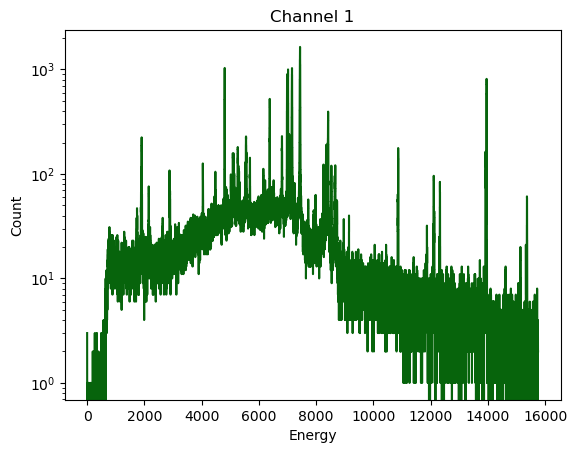

In [4]:
chan1 = sample.channels['chan1']
chan1.plot_channel(name= 'Channel 1')
plt.savefig("Images/chan1_base.png", dpi=300, bbox_inches="tight")


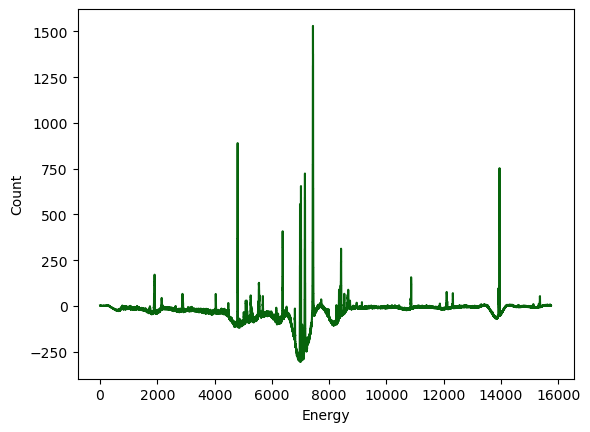

In [5]:
chan1.spline_baseline_subtract()
chan1.plot_channel(flat = True)
plt.savefig("Images/chan1_spline.png", dpi=300, bbox_inches="tight")

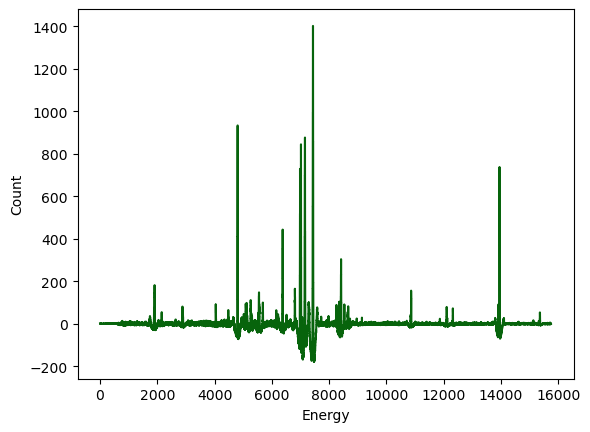

In [6]:
chan1.savgol_baseline_subtract()
chan1.plot_channel(flat = True)
plt.savefig("Images/chan1_savgol.png", dpi=300, bbox_inches="tight")

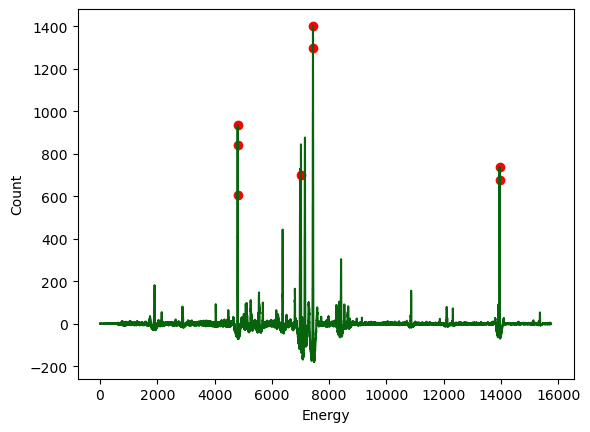

In [7]:
chan1.deriv_peaks()
chan1.plot_channel(with_peaks = True, flat= True)
plt.savefig("Images/chan1_savgol_d2.png", dpi=300, bbox_inches="tight")

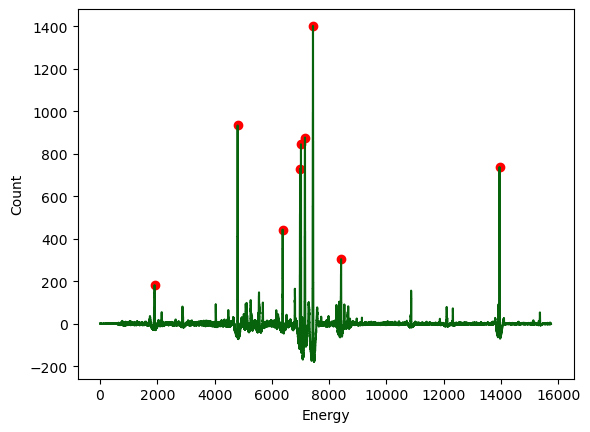

In [8]:
chan1.scipy_peaks()
chan1.plot_channel(with_peaks = True, flat= True)
plt.savefig("Images/chan1_scipy_peaks.png", dpi=300, bbox_inches="tight")

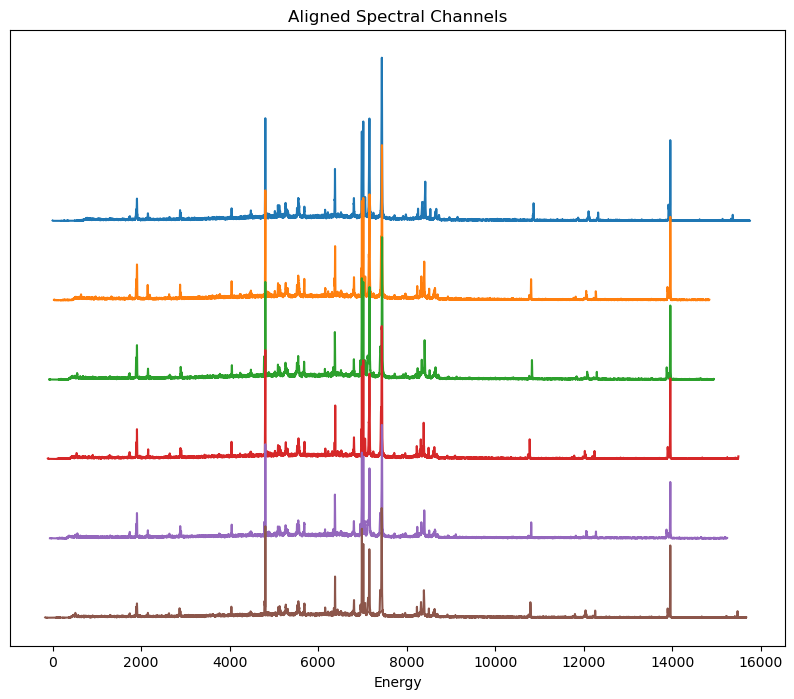

<Figure size 640x480 with 0 Axes>

In [10]:
for chan in sample.channels.values():
    chan.savgol_baseline_subtract()
    chan.scipy_peaks()


sample.algorithmic_aligning()
sample.waterfall_plot_particle()
plt.savefig("Images/waterfall_plot.png", dpi=300, bbox_inches="tight")